In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from implementations import *
from proj1_helpers import *
from preprocessing import *
from crossvalidation import *
from plots import *

# Main with split jet

As we have seen on the data exploration on the  ```main.ipynb ```, there is one categorical feature called  ```PRI_JET_NUM ``` which indicates the number of jets per sample (0, 1, 2 or 3). On this second main, we take advantage of this variable to split our dataset and fit our models on the newly split data.

#### Load the training data into feature matrix, class labels, and event ids:

In [5]:
DATA_TRAIN_PATH = '../data/train.csv'
DATA_TEST_PATH = '../data/test.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH, sub_sample=False)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

## Applying methods

In [6]:
seed = np.random.seed(10)

### Method 1 : least_squares_GD

#### "Parameters pre-tunage"

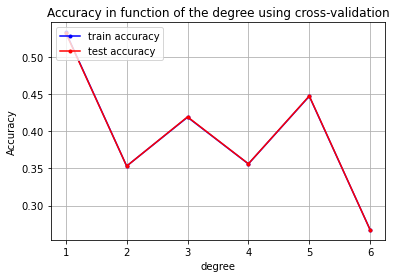

Accuracies for different degree :
[0.532896, 0.35315199999999997, 0.419564, 0.35626800000000003, 0.4478, 0.267076]


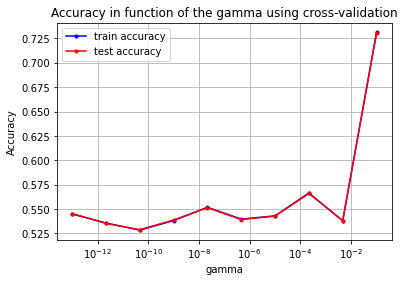

Accuracies for different gamma :
[0.545356, 0.535268, 0.528752, 0.538732, 0.551384, 0.5392, 0.5427120000000001, 0.565992, 0.5380199999999999, 0.73034]


In [13]:
#Fixed parameters :
k_fold=4
max_iters = 50

#Parameters to tune :
degrees = 1+np.arange(6)
gamma= 1e-13

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, least_squares_GD, seed=seed, params=degrees, gamma=gamma, max_iters=max_iters, name='degree', jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas= np.logspace(-13, -1, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, least_squares_GD, seed=seed, params=gammas, degree=degree, max_iters=max_iters, name='gamma', jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [14]:
degrees = [1, 2]
gammas = np.linspace(1e-2, 1e-1, 9)

#### Parameters tunage

In [15]:
# cross validation
deg_ls_gd, gamma_ls_gd, acc_te_ls_gd, acc_tr_ls_gd = tune_best_deg_gam(y, tX, k_fold, least_squares_GD, degrees=degrees, gammas=gammas, seed=seed, max_iters=max_iters, jet=True)
print('The degree obtaining the maximum test accuracy is : ', deg_ls_gd)
print(' ')
print('Combined with a best learning rate gamma : ', gamma_ls_gd)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls_gd)
print(' ')
print('While the train accuracy is : ', acc_tr_ls_gd)

The degree obtaining the maximum test accuracy is :  1
 
Combined with a best learning rate gamma :  0.01
 
And the associated maximum test accuracy is :  0.5368160000000001
 
While the train accuracy is :  0.537352


### Method 2 : least_squares_SGD

#### "Parameters pre-tunage"

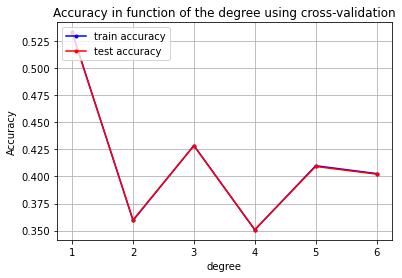

Accuracies for different degree :
[0.532436, 0.359872, 0.42835599999999996, 0.35096, 0.409188, 0.40213199999999993]


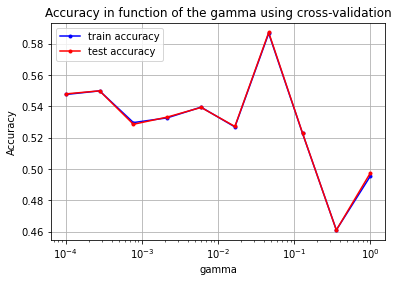

Accuracies for different gamma :
[0.547884, 0.549828, 0.5285080000000001, 0.533096, 0.5392480000000001, 0.527132, 0.587064, 0.52288, 0.46102799999999994, 0.49726799999999993]


In [17]:
#Fixed parameters :
k_fold=5
max_iters = 50
batch_size = 1

#Parameters to tune :
degrees = 1+np.arange(6)
gamma=1e-9

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, least_squares_SGD, seed=seed, params=degrees, gamma=gamma, batch_size=batch_size, max_iters=max_iters, name='degree', jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas=np.logspace(-4, 0, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, least_squares_SGD, seed=seed, params=gammas, degree=degree, max_iters=max_iters, batch_size=batch_size, name='gamma', jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [19]:
degrees = [1, 2, 3]
gammas = np.linspace(1e-2, 1e-1, 5)

#### Parameters tunage

In [20]:
# cross validation
deg_ls_sgd, gamma_ls_sgd, acc_te_ls_sgd, acc_tr_ls_sgd = tune_best_deg_gam(y, tX, k_fold, least_squares_SGD, degrees=degrees, gammas=gammas, seed=seed, batch_size=batch_size, max_iters=max_iters, jet=True)
print('The degree obtaining the maximum test accuracy is : ', deg_ls_sgd)
print(' ')
print('Combined with a best learning rate gamma : ', gamma_ls_sgd)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls_sgd)
print(' ')
print('While the train accuracy is : ', acc_tr_ls_sgd)

The degree obtaining the maximum test accuracy is :  1
 
Combined with a best learning rate gamma :  0.1
 
And the associated maximum test accuracy is :  0.519524
 
While the train accuracy is :  0.519911


### Method 3 : least_squares

#### Parameters tunage

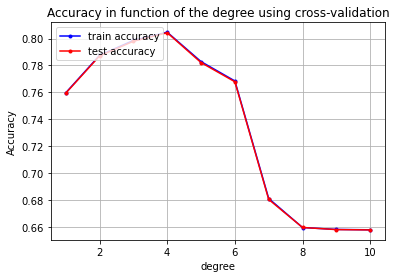

The degree obtaining the maximum test accuracy is :  4
 
And the associated maximum test accuracy is :  0.803748
 
While the train accuracy is :  0.8044653333333334


In [21]:
# parameters
degrees = 1+ np.arange(10)
k_fold = 4

#Plot
best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, least_squares, seed=seed, params=degrees, name='degree', jet=True)
CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

# cross validation

deg_ls, acc_te_ls, acc_tr_ls = tune_best_deg(y, tX, k_fold, least_squares, degrees=degrees, seed=seed, jet=True)
print('The degree obtaining the maximum test accuracy is : ', deg_ls)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls)
print(' ')
print('While the train accuracy is : ', acc_tr_ls)

### Method 4 : ridge_regression

#### "Parameters pre-tunage"

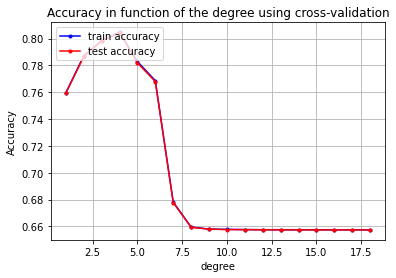

Accuracies for different degree :
[0.7591760000000001, 0.78654, 0.7982, 0.804384, 0.7818719999999999, 0.7679279999999999, 0.6777479999999999, 0.6593, 0.657948, 0.657644, 0.6575359999999999, 0.6574599999999999, 0.657404, 0.657404, 0.657388, 0.657388, 0.657388, 0.6573599999999999]


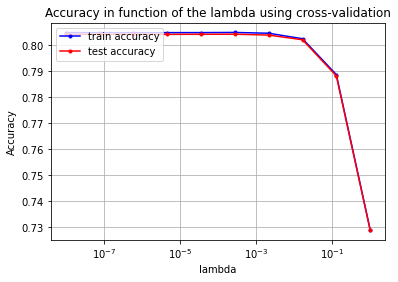

Accuracies for different lambda :
[0.8042720000000001, 0.804284, 0.804276, 0.804276, 0.804308, 0.804336, 0.8039999999999999, 0.802192, 0.788296, 0.728924]


In [22]:
# parameters
k_fold = 4

#Parameters to tune :
degrees = 1+ np.arange(18)
lambda_ = 1e-03 

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, ridge_regression, seed=seed, params=degrees, lambda_=lambda_, name='degree', jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
lambdas = np.logspace(-8, 0, 10)

best_lam, acc_te_lam, acc_tr_lam = tune_best_one(y, tX, k_fold, ridge_regression, seed=seed, params=lambdas, degree=degree, name='lambda', jet=True)

CV_param_plot(lambdas, acc_tr_lam, acc_te_lam, name_param="lambda")

print("Accuracies for different lambda :")
print(acc_te_lam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [23]:
degrees = [1, 2, 3, 4, 5, 6]
lambdas = np.logspace(-8, -3, 6)

#### Parameters tunage

In [24]:
# cross validation
deg_rr, lambda_rr, acc_te_rr, acc_tr_rr = tune_best_deg_lam(y, tX, k_fold, ridge_regression, degrees=degrees, lambdas=lambdas, seed=seed, jet=True)

print('The degree obtaining the maximum test accuracy is : ', deg_rr)
print(' ')
print('With a lambda equal to : ', lambda_rr)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_rr)
print(' ')
print('While the train error is : ', acc_tr_rr)

The degree obtaining the maximum test accuracy is :  4
 
With a lambda equal to :  1e-06
 
And the associated maximum test accuracy is :  0.8042
 
While the train error is :  0.8048866666666666


### Method 5 : logistic_regression

#### "Parameters pre-tunage"

In [ ]:
# parameters
k_fold = 4
max_iters = 50

#Parameters to tune :
degrees = 1+ np.arange(10)
gamma = 1e-05

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, logistic_regression, seed=seed, params=degrees, gamma=gamma, max_iters=max_iters, name='degree', log=True, jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas = np.logspace(-8, 0, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, logistic_regression, seed=seed, params=gammas, degree=degree, max_iters=max_iters, name='gamma', log=True, jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [21]:
degrees = [1, 2, 3]
gammas = np.logspace(-4, -3, 5)

#### Parameters tunage

In [22]:
# cross validation
deg_lr, gam_lr, acc_te_lr, acc_tr_lr = tune_best_deg_gam(y, tX, k_fold, logistic_regression, degrees=degrees, gammas=gammas, max_iters=max_iters, log=True, seed=seed, jet=True)

print('The degree obtaining the maximum test accuracy is : ', deg_lr)
print(' ')
print('With a learning rate equal to : ', gam_lr)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_lr)
print(' ')
print('While the train accuracy is : ', acc_tr_lr)

The degree obtaining the maximum test accuracy is :  2
 
With a learning rate equal to :  0.001
 
And the associated maximum test accuracy is :  0.7686
 
While the train accuracy is :  0.7825333333333333


### Method 6 : reg_logistic_regression

#### "Parameters pre-tunage"

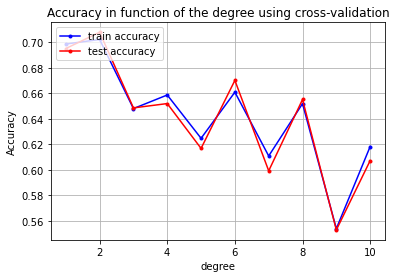

Accuracies for different degree :
[0.6952, 0.708, 0.6486000000000001, 0.652, 0.6168, 0.6701999999999999, 0.5992, 0.6552, 0.5528, 0.6072]


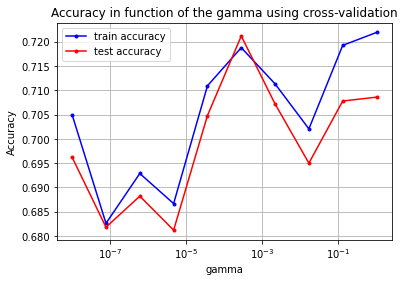

Accuracies for different gamma :
[0.6962, 0.6818, 0.6882, 0.6812, 0.7048, 0.7212000000000001, 0.7071999999999999, 0.6950000000000001, 0.7078, 0.7086]


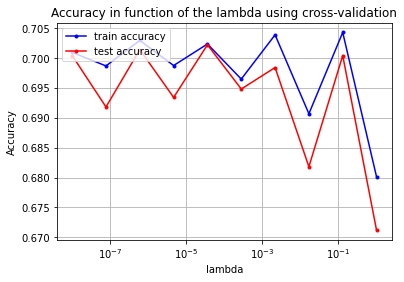

Accuracies for different lambda :
[0.7003999999999999, 0.6918, 0.7014, 0.6934, 0.7021999999999999, 0.6948, 0.6984, 0.6818, 0.7004, 0.6711999999999999]


In [23]:
# parameters
k_fold = 4
max_iters=50


#Parameters to tune :
degrees=1+ np.arange(10)
gamma=0.0001
lambda_=1e-5

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, reg_logistic_regression, seed=seed, params=degrees, gamma=gamma, lambda_=lambda_, max_iters=max_iters, name='degree', log=True, jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree=best_degree
gammas=np.logspace(-8, 0, 10)
lambda_=1e-5

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, reg_logistic_regression, seed=seed, params=gammas, degree=degree, lambda_=lambda_, max_iters=max_iters, name='gamma', log=True, jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

#Parameters to tune :
degree=best_degree
gamma=best_gam
lambdas=np.logspace(-8, 0, 10)

best_lam, acc_te_lam, acc_tr_lam = tune_best_one(y, tX, k_fold, reg_logistic_regression, seed=seed, params=lambdas, degree=degree, gamma=gamma, max_iters=max_iters, name='lambda', log=True, jet=True)

CV_param_plot(lambdas, acc_tr_lam, acc_te_lam, name_param="lambda")

print("Accuracies for different lambda :")
print(acc_te_lam)

Using this "pre-tunage", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [24]:
degrees=[1, 2, 3]
gammas=np.logspace(-7, -1, 10)
lambdas=np.logspace(-7, -1, 10)

#### Parameters tunage

In [25]:
# cross validation
deg_lr_reg, gam_lr_reg, lambda_lr_reg, acc_te_lr_reg, acc_tr_lr_reg = tune_best_deg_lam_gam(y, tX, k_fold, reg_logistic_regression, degrees=degrees,
                                                                 lambdas=lambdas, gammas=gammas, log=True, seed=seed, jet=True) 

print('The degree obtaining the maximum test accuracy is : ', deg_lr_reg)
print(' ')
print('With a gamma equal to : ', gam_lr_reg)
print(' ')
print('and a lambda equal to : ', lambda_lr_reg)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_lr_reg)
print(' ')
print('While the train accuracy is : ', acc_tr_lr_reg)

The degree obtaining the maximum test accuracy is :  1
 
With a gamma equal to :  0.004641588833612773
 
and a lambda equal to :  0.1
 
And the associated maximum test accuracy is :  0.7242
 
While the train accuracy is :  0.7199333333333333


## Compare methods

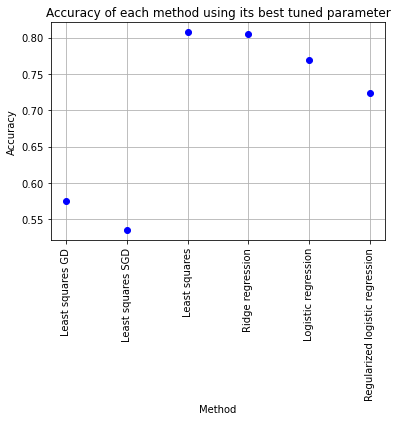

In [26]:
accuracies = [acc_te_ls_gd, acc_te_ls_sgd, acc_te_ls, acc_te_rr, acc_te_lr, acc_te_lr_reg]
methods = ['Least squares GD', 'Least squares SGD', 'Least squares', 'Ridge regression', 'Logistic regression', 'Regularized logistic regression']

compare(methods, accuracies)